In [80]:
# Loading Libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [81]:
data=pd.read_csv("HR.csv")
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [82]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [83]:
data.shape

(14999, 10)

In [84]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [85]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [86]:
data.duplicated().sum()

3008

In [87]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [88]:
data.duplicated().sum()

0

In [89]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


In [90]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


In [91]:
data=pd.get_dummies(data)

In [92]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.005382,-0.002552,...,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,0.017031,-0.027838,0.018579
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.002885,-0.005448,...,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,-0.017543,0.010416,-0.000755
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.001464,0.010077,...,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.002820,-0.000914,0.002484
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.001007,0.004159,...,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.002499,-0.000675,0.002065
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.003233,-0.008380,...,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,0.029111,-0.032541,0.016612
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.009777,0.011793,...,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.002735,0.001580,-0.003108
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.003324,-0.029016,...,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,-0.094769,0.099113,-0.047214
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.034334,0.025610,...,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,0.063982,-0.076576,0.041601
sales_IT,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,1.000000,-0.073779,...,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826,-0.010617,0.005370,0.000482
sales_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,-0.073779,1.000000,...,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.013363,-0.007301,0.014761


In [93]:
X=data.drop("left",axis=1).values
y=data["left"].values

In [94]:
X.shape

(11991, 20)

In [95]:
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-1.03566801, -1.10899046, -1.54992118, ..., -0.29998636,
         1.04356331, -0.88415136],
       [ 0.70663718,  0.85137984,  1.02919412, ..., -0.29998636,
        -0.95825523,  1.13102806],
       [-2.15572134,  0.97019016,  2.74860432, ..., -0.29998636,
        -0.95825523,  1.13102806],
       ...,
       [ 0.91405447, -1.0495853 , -0.69021608, ...,  3.33348485,
        -0.95825523, -0.88415136],
       [-1.24308529, -0.39612853, -0.69021608, ...,  3.33348485,
        -0.95825523, -0.88415136],
       [-0.53786652,  0.07911275,  0.16948902, ..., -0.29998636,
         1.04356331, -0.88415136]])

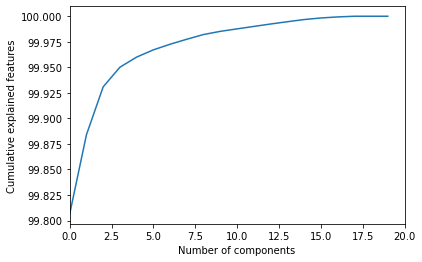

In [96]:
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlim(0,20,1)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained features")
plt.show()

In [97]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 99.80647165,  99.88397729,  99.93087549,  99.9501206 ,
        99.96002278,  99.96710436,  99.9725982 ,  99.97751486,
        99.98211876,  99.98521811,  99.98763914,  99.99003062,
        99.99240378,  99.9946289 ,  99.99675936,  99.99830123,
        99.99932297, 100.        , 100.        , 100.        ])

In [98]:
pca.explained_variance_ratio_

array([9.98064716e-01, 7.75056474e-04, 4.68981957e-04, 1.92451097e-04,
       9.90218360e-05, 7.08157744e-05, 5.49383619e-05, 4.91666236e-05,
       4.60390272e-05, 3.09934677e-05, 2.42102863e-05, 2.39147976e-05,
       2.37316598e-05, 2.22511481e-05, 2.13046268e-05, 1.54187484e-05,
       1.02173637e-05, 6.77028878e-06, 4.10101222e-36, 2.74205136e-36])

In [100]:
sklearn_pca = PCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)
print("The Original Shape : ",X.shape)
print("The new PCA shape : ",X_pca.shape)
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.3,random_state=10)
svc_classifier = SVC()
svc_classifier.fit(X_train,y_train)
print("Train Acc :", svc_classifier.score(X_train,y_train))
print("Test Acc :", svc_classifier.score(X_test,y_test))


The Original Shape :  (11991, 20)
The new PCA shape :  (11991, 2)
Train Acc : 0.8533301560824497
Test Acc : 0.8368538076709283
